In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("Dataset salary 2024.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [76]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [78]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [79]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [80]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16529    False
16530    False
16531    False
16532    False
16533    False
Length: 16534, dtype: bool

In [81]:
#We'll standardize all currency in USD
df = df.drop(
    columns={
        'salary',
        'salary_currency'
    }
).copy()
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [82]:
df.columns.to_list() 

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [83]:
df = df.rename(
    columns = {
        'work_year' : 'year',
        'salary_in_usd' : 'salary'
    }
).copy()

df.head(5)

,year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M


In [84]:
df.nunique()

year                     5
experience_level         4
employment_type          4
job_title              155
salary                2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [85]:
company_loc = df['company_location'].unique()
print('List of company location:')
print(company_loc)


List of company location:
['US' 'AU' 'GB' 'CA' 'NL' 'LT' 'DK' 'FR' 'ZA' 'NZ' 'AR' 'ES' 'KE' 'LV'
 'IN' 'DE' 'IL' 'FI' 'AT' 'BR' 'CH' 'AE' 'PL' 'SA' 'UA' 'EG' 'PH' 'TR'
 'OM' 'MX' 'PT' 'BA' 'IT' 'AS' 'IE' 'EE' 'MT' 'HU' 'LB' 'RO' 'VN' 'NG'
 'LU' 'GI' 'CO' 'SI' 'GR' 'MU' 'RU' 'KR' 'CZ' 'QA' 'GH' 'SE' 'AD' 'EC'
 'NO' 'JP' 'HK' 'CF' 'SG' 'TH' 'HR' 'AM' 'PK' 'IR' 'BS' 'PR' 'BE' 'ID'
 'MY' 'HN' 'DZ' 'IQ' 'CN' 'CL' 'MD']


In [86]:
# General Salary Analysis
# How does the average salary in USD vary by experience level?
# What is the distribution of salaries in USD across different job titles?
# How does salary in USD differ between full-time and part-time employees?
# What are the top 10 highest-paying job titles?

In [108]:
top_avg_salary = df.groupby('job_title')['salary'] \
.mean() \
.round(2) \
.sort_values(ascending=False) \
.head(15)

print('Highest Paying Job:')
print(top_avg_salary)

Highest Paying Job:
job_title
Analytics Engineering Manager     399880.00
Data Science Tech Lead            375000.00
Head of Machine Learning          299758.43
Managing Director Data Science    280000.00
AWS Data Architect                258000.00
AI Architect                      252551.24
Cloud Data Architect              250000.00
Director of Data Science          218775.33
Head of Data                      211860.20
Prompt Engineer                   205093.59
Data Infrastructure Engineer      204192.05
Robotics Software Engineer        196625.00
Data Analytics Lead               195536.74
Principal Data Scientist          194089.60
Data Science Manager              193961.32
Name: salary, dtype: float64


193961.32


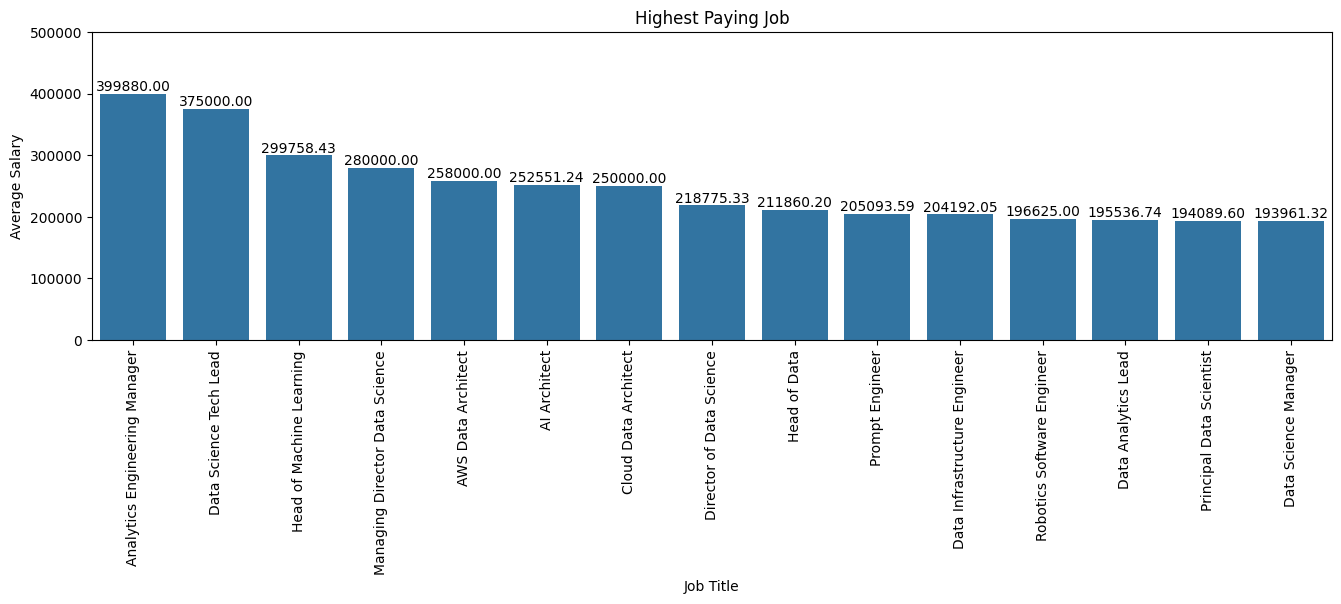

In [111]:
plt.figure(figsize=(16,4))

sns.barplot(
    x=top_avg_salary.index,
    y=top_avg_salary.values
)

plt.title('Highest Paying Job')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.yticks(range(0, 550000, 100000))

for i in range(len(top_avg_salary)):
    plt.text(i,
             top_avg_salary.iloc[i],
             f'{top_avg_salary.iloc[i]:.2f}',
             ha='center',
             va='bottom'
             )
print(top_avg_salary.iloc[i])

plt.show()